In [25]:
import sys
import psutil, os

sys.path.append('../')

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import time
from core.function import F1, Rosenbrock, F2neg
from search.grad import grad_adapter
from search.grad_fr import gradient_fr
from search.newton import newton
from utils.matplotlib_utils import draw_paths

In [28]:
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

In [29]:
def mem_info():
    cur_process = psutil.Process(os.getppid())
    all_processes = [cur_process] + cur_process.children(recursive=True)
    rss = sum([p.memory_info().rss for p in all_processes])
    return rss

In [36]:
def show_stat(path):
    print('Result:', path[-1])
    print('Iterations:', len(path))
    print("\n");
    
def show_stats(stats):
    print("Algo\t", "Mean time\t\t","Mean iteration\t", "Mean RAM\t\t")
    print("Grad\t", 
          str(np.mean(np.array([stats[0][i][0] for i in range(len(stats[0]))]))) + "\t",
          str(np.mean(np.array([stats[0][i][1] for i in range(len(stats[0]))]))) + "\t\t",
          sizeof_fmt(np.mean(np.array([stats[0][i][2] for i in range(len(stats[0]))])))
         )
    print("Grad FR\t", 
          str(np.mean(np.array([stats[1][i][0] for i in range(len(stats[1]))]))) + "\t",
          str(np.mean(np.array([stats[1][i][1] for i in range(len(stats[1]))]))) + "\t\t",
          sizeof_fmt(np.mean(np.array([stats[1][i][2] for i in range(len(stats[1]))])))
         )
    print("Newton\t", 
          str(np.mean(np.array([stats[2][i][0] for i in range(len(stats[2]))]))) + "\t",
          str(np.mean(np.array([stats[2][i][1] for i in range(len(stats[2]))]))) + "\t\t",
          sizeof_fmt(np.mean(np.array([stats[2][i][2] for i in range(len(stats[2]))])))
         )

In [31]:
def analyze(points, f):
    stats = [[],[],[],[]]
    for point in points:
        print("Point: ", point, "\n")
        
        print("grad")
        start_mem = mem_info()
        start_time = time.time()
        _, _, path = grad_adapter(F1(), point)
        stats[0].append([time.time() - start_time, len(path), (mem_info() - start_mem)])
        show_stat(path)
        
        print("grad_fr")
        start_mem = mem_info()
        start_time = time.time()
        _, _, path = gradient_fr(F1(), point)
        stats[1].append([time.time() - start_time, len(path), (mem_info() - start_mem)])
        show_stat(path)
        
        print("newton")
        start_mem = mem_info()
        start_time = time.time()
        _, _, path = newton(F1(), point)
        stats[2].append([time.time() - start_time, len(path), (mem_info() - start_mem)])
        show_stat(path)
    show_stats(stats)

In [32]:
points = [np.array([0.,0.]), np.array([15.,15]), np.array([-15.,15.]), np.array([15.,-15.]), np.array([-15.,-15])]

In [38]:
analyze(points, F1())

Point:  [0. 0.] 

grad
Result: [0.99899777 0.99899777]
Iterations: 1389


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [15. 15.] 

grad
Result: [1.00100445 1.00100445]
Iterations: 1919


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15.  15.] 

grad
Result: [0.99991269 0.99991225]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [ 15. -15.] 

grad
Result: [0.99993853 0.99993823]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15. -15.] 

grad
Result: [0.99900133 0.99899134]
Iterations: 1946


grad_fr
Result: [1.00000001 1.00000001]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Algo	 Mean time		 Mean iteration	 Mean RAM		
Grad	 0.9877140522003174	 1053.2		 12.7MiB
Grad FR	 0.0011388301849365235	 4.0		 0.0B
Newton	 0.00034914016723632815	 2.0		 0.0B


In [39]:
analyze(points, Rosenbrock())

Point:  [0. 0.] 

grad
Result: [0.99899777 0.99899777]
Iterations: 1389


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [15. 15.] 

grad
Result: [1.00100445 1.00100445]
Iterations: 1919


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15.  15.] 

grad
Result: [0.99991269 0.99991225]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [ 15. -15.] 

grad
Result: [0.99993853 0.99993823]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15. -15.] 

grad
Result: [0.99900133 0.99899134]
Iterations: 1946


grad_fr
Result: [1.00000001 1.00000001]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Algo	 Mean time		 Mean iteration	 Mean RAM		
Grad	 0.9825817584991455	 1053.2		 12.2MiB
Grad FR	 0.0010639190673828124	 4.0		 0.0B
Newton	 0.0004288673400878906	 2.0		 819.2B


In [40]:
analyze(points, F2neg())

Point:  [0. 0.] 

grad
Result: [0.99899777 0.99899777]
Iterations: 1389


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [15. 15.] 

grad
Result: [1.00100445 1.00100445]
Iterations: 1919


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15.  15.] 

grad
Result: [0.99991269 0.99991225]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [ 15. -15.] 

grad
Result: [0.99993853 0.99993823]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15. -15.] 

grad
Result: [0.99900133 0.99899134]
Iterations: 1946


grad_fr
Result: [1.00000001 1.00000001]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Algo	 Mean time		 Mean iteration	 Mean RAM		
Grad	 0.9839358329772949	 1053.2		 12.2MiB
Grad FR	 0.0011789321899414063	 4.0		 3.2KiB
Newton	 0.00032258033752441406	 2.0		 0.0B


In [11]:
def analyze_paths(point, f):
    _, _, path1 = grad_adapter(f, point)
    _, _, path2 = gradient_fr(f, point)
    _, _, path3 = newton(f, point)
    draw_paths(f.f, [path1, path2, path3], -3, 3, 0.2, -1, 4, 0.2, 100) 

100%|██████████| 23/23 [00:00<00:00, 819.76it/s]

Algo:  grad
Result: [1.00100223 1.00100223]
Iterations: 1389


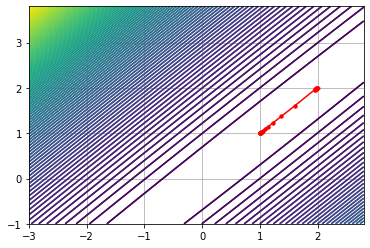

100%|██████████| 3/3 [00:00<00:00, 695.27it/s]

Algo:  grad_fr
Result: [1. 1.]
Iterations: 4


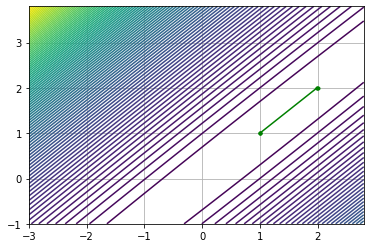

100%|██████████| 1/1 [00:00<00:00, 750.73it/s]

Algo:  newton
Result: [1. 1.]
Iterations: 2


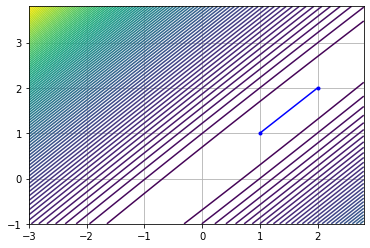

In [16]:
point = np.array([2., 2.])
analyze_paths(point, F1())

100%|██████████| 15/15 [00:00<00:00, 1074.03it/s]

Algo:  grad
Result: [1.00097462 1.00195454]
Iterations: 536


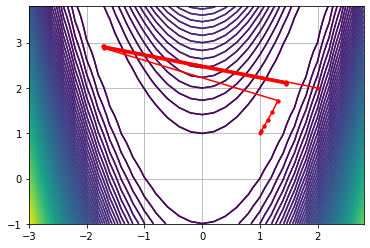

100%|██████████| 11/11 [00:00<00:00, 1052.33it/s]

Algo:  grad_fr
Result: [0.99847585 0.99693928]
Iterations: 106


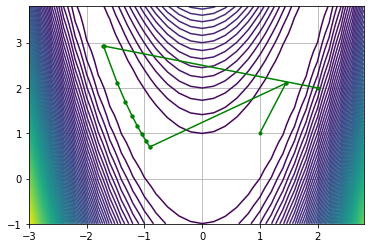

100%|██████████| 5/5 [00:00<00:00, 839.63it/s]

Algo:  newton
Result: [1. 1.]
Iterations: 6


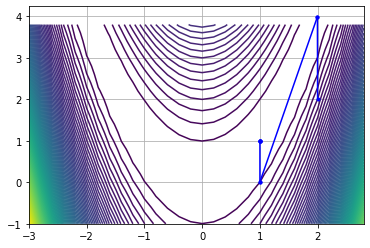

In [13]:
point = np.array([2., 2.])
analyze_paths(point, Rosenbrock())

100%|██████████| 5/5 [00:00<00:00, 995.04it/s]

Algo:  grad
Result: [1.96711603 2.8860359 ]
Iterations: 6


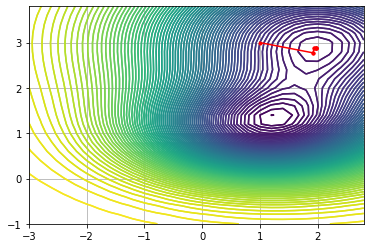

100%|██████████| 5/5 [00:00<00:00, 958.04it/s]

Algo:  grad_fr
Result: [1.9671504  2.88611351]
Iterations: 6


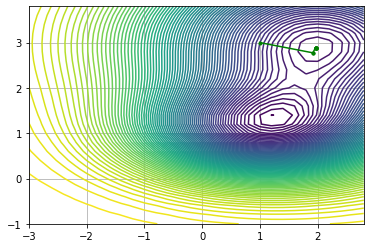

100%|██████████| 4/4 [00:00<00:00, 956.51it/s]

Algo:  newton
Result: [1.96715142 2.88611471]
Iterations: 5


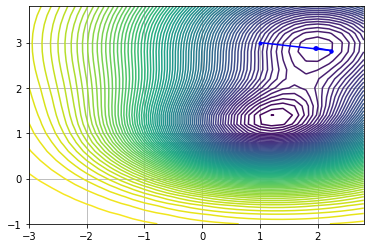

In [14]:
point = np.array([1., 3.])
analyze_paths(point, F2neg())